In [1]:
# @title Getting into Business: Real Estate Investment Exploration
'''
Goal: Basic exloration (EDA) of Washiington home price data set from 2014
Extra: Predict Home Prices from other factors like square footage, location, etc.
'''

'\nGoal: Basic exloration (EDA) of Washiington home price data set from 2014\nExtra: Predict Home Prices from other factors like square footage, location, etc.\n'

In [2]:

###Importing Data:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


#Establish File Path
file_path = '/content/drive/My Drive/Data_Analytics/Housing_Data.csv'

try:
    #Attempt to read the CSV file using pandas
    df = pd.read_csv(file_path, encoding='latin-1')

    #Print the first few rows of the DataFrame to verify import
    print(df.head())
    print(df.tail())

    print() #spacing

    #Print basic DataFrame info (column names, data types)
    print(df.info())

#handle Errors
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file. Check the file format and delimiters.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200   

In [3]:
# @title Part I- Understanding the Data: When, Where, How, Attributes, Data Types

In [ ]:
#When was the Data Acquired:
print(df['date'].min())

print(df['date'].max())
'''
-The Data appears to have been collected in 2014
-The time range of the data collected is between May 2nd and July 10th (2014)
'''
#Where was the data acquired, geographics?
print(df['country'].unique())
print(df['statezip'].unique())
print(df['city'].unique())

'''
-The data was collected from various cities in Washington State, USA
'''
#How was the data collected, methods
'''
No source is listed for the data set which reduces credibility.
However, the attributes collected are and would all have been publically available
from various records or websites.
'''

#What are the attributes of the data set, description and data type
'''
List of Attributes, descriptions:

1.) Date (Categorical, Ordinal): The date when the property was sold.

2.) Price (Numerical, Ratio): The sale price of the property in USD. This is the target variable we aim
to predict.

3.) Bedrooms (Numerical, Ratio): The number of bedrooms in the property. Generally, properties with
more bedrooms tend to have higher prices.

4.) Bathrooms (Numerical, Ratio): The number of bathrooms in the property. Similar to bedrooms,
more bathrooms can increase a property’s value.

5.) Sqft Living (Numerical Ratio): The size of the living area in square feet. Larger living areas are
typically associated with higher property values.

6.)Sqft Lot (Numerical Ratio):The size of the lot in square feet. Larger lots may increase a property’s
desirability and value.

7.) Floors (Numerical, Ratio): The number of floors in the property. Properties with multiple floors may
offer more living space and appeal.

8.) Waterfront (Categorical, Binary): A binary indicator (1 if the property has a waterfront view, 0 = if not).
Properties with waterfront views are almost always valued higher.

9.) View (Categorical, Ordinal): An index from 0 to 4 indicating the quality of the property’s view. Better
views are likely to enhance a property’s value.

10.) Condition (Categorical, Ordinal): An index from 1 to 5 rating the condition of the property. Properties
in better condition are typically worth more.

11.) Sqft Above (Numerical, Ratio): The square footage of the property above the basement. This can
help isolate the value contribution of above-ground space.

12.) Sqft Basement (Numerical, Ratio): The square footage of the basement. Basements may add value
depending on their usability.

13.) Yr Built (Numerical, Interval): The year the property was built. Older properties may have historical
value, while newer ones may offer modern amenities.

14.) Yr Renovated (Numerical, Interval): The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.

15.) Street (Categorical, Nominal): The street address of the property. This feature can be used to analyze
location-specific price trends.

16.) City (Categorical, Nominal): The city where the property is located. Different cities have distinct market
dynamics.

17.) Statezip (Categorical, Nominal): The state and zip code of the property. This feature provides regional
context for the property.

18.) Country (Categorical, Nominal): The country where the property is located.

Note: The attributes are composed of various data types, but most are numerical intervals or ratios and categorical nominals
'''

In [ ]:
# @title Part II- Data Summary & Initial Insights: EDA including- Summary Stats, Empty Values, Outliers, Visualizations

#Print Array of Data Set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as map
np.set_printoptions(threshold=np.inf, precision=20, suppress=True)
df = pd.read_csv(file_path)
data_array = df.to_numpy()
print(", ".join(df.columns))
print(data_array)


In [ ]:
#Abreviated Display
df_display = pd.DataFrame(data_array, columns=df.columns)
print(df_display)

In [ ]:
#Formatted Table
from tabulate import tabulate

#Note: 'data_array' is the NumPy array and 'df' is the saved data frame

table = tabulate(data_array, headers=df.columns, tablefmt="fancy_grid")
#other table format options = ... 'plain', 'simple', 'grid', 'fancy_grid', 'pipe', 'html', 'tsv'
print(table)


In [8]:
# @title (Basic Information on Data Set)
print(f"{df.info()}\n")#information of each variable
print(f"{df.describe()}\n") #average, min, max, etc.

# Additionals: median, mode, variance, range

mode = df.mode(numeric_only=True)
print("Medians:\n")
print(mode)
print()

var = df.var(numeric_only=True)
print("Variance: \n")
print(var)
print()

range = df.max(numeric_only=True) - df.min(numeric_only=True)
print("Range: \n")
print(range)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [9]:
## Missing or Empty Values

for column in df.columns:
    #Features that must exist/could not have meaningful zero value
    if pd.api.types.is_numeric_dtype(df[column]) and column not in ['waterfront', 'view', 'sqft_basement', 'yr_renovated','sqft_loft']:
        # Count values equal to 0 using a boolean mask and sum
        missing_values = (df[column] == 0).sum()
        missing_rows = df[df[column] == 0]  # Rows where the value is 0
        print(f"Missing values in column '{column}': {missing_values}")
        print(f"Rows with 0 values in '{column}':")
        print(missing_rows)

    #Features that could have meaningful zero value
    elif column in ['waterfront', 'view', 'sqft_basement', 'yr_renovated','loft']:
        missing_values = df[column].isnull().sum()
        missing_rows = df[df[column].isnull()]  # Rows where the value is NaN
        print(f"Missing values in column '{column}': {missing_values}")
        print(f"Rows with missing values in '{column}':")
        print(missing_rows)

    else:
        for column in df.columns:
         if df[column].isnull().any():
            missing_values = df[column].isnull().sum()
            missing_rows = df[df[column].isnull()]
            print(f"Missing values in column '{column}': {missing_values}")
            print(f"Rows with missing values in '{column}':")
            print(missing_rows)


Missing values in column 'price': 49
Rows with 0 values in 'price':
                     date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
3894  2014-05-05 00:00:00    0.0       3.0       1.75         1490     10125   
3896  2014-05-05 00:00:00    0.0       4.0       2.75         2600      5390   
3897  2014-05-05 00:00:00    0.0       6.0       2.75         3200      9200   
3898  2014-05-06 00:00:00    0.0       5.0       3.50         3480     36615   
3901  2014-05-07 00:00:00    0.0       5.0       1.50         1500      7112   
3902  2014-05-07 00:00:00    0.0       4.0       4.00         3680     18804   
3914  2014-05-09 00:00:00    0.0       2.0       2.50         2200    188200   
3916  2014-05-09 00:00:00    0.0       4.0       2.25         2170     10500   
3922  2014-05-12 00:00:00    0.0       5.0       4.50         4630      6324   
3923  2014-05-13 00:00:00    0.0       5.0       4.00         4430      9000   
3925  2014-05-13 00:00:00    0.0       4.0       4.5

In [10]:
#Notes on missing values
'''
-There are 49 zero/missing values in the price column
-These are likely unlisted homes, confidential or private sales with undisclosed values, or incomplete listings
-There are an additional two values missing in the bedrooms and bathrooms column (each), under rows #1905 and #2407
-^These are likely missing values due to human error or incomplete entry as both homes have square footage data and would by necessity have these features
'''
#Potential handling Strategies
'''
The data set is relatively large (4,000+ homes) and the missing values seem uncorrelated in feature groupings (ie. different locations, dates, and not all have high square footage etc.)
-So simply removing the rows with missing prices or the two with missing bedroom/bathroom values should have little affect on the data set
-Otherwise these data points could be replaced with median prices, or median number of rooms
-Additionaly, relatively accurate estimates could likely be made for the missing data based on the most influential factors like location, size, etc. however this is largely the purpose of the data set and could skew the final analysis

'''

'\nThe data set is relatively large (4,000+ homes) and the missing values seem uncorrelated in feature groupings (ie. different locations, dates, and not all have high square footage etc.)\n-So simply removing the rows with missing prices or the two with missing bedroom/bathroom values should have little affect on the data set\n-Otherwise these data points could be replaced with median prices, or median number of rooms\n-Additionaly, relatively accurate estimates could likely be made for the missing data based on the most influential factors like location, size, etc. however this is largely the purpose of the data set and could skew the final analysis \n\n'

In [11]:
## Clean Data Set from Missing Values (Remove)
# Remove rows where the 'price' column has a value of 0
# and remove rows where the 'bedrooms' or 'bathrooms' columns have missing values (NaN)
df_cleaned = df[(df['price'] != 0) & (df['bedrooms'].notnull()) & (df['bathrooms'].notnull())]

# Reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)



Cleaned DataFrame:
                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-09 00:00:00  3.760000e+05       3.0       2.00         1340   
1     2014-05-09 00:00:00  8.000000e+05       4.0       3.25         3540   
2     2014-05-09 00:00:00  2.238888e+06       5.0       6.50         7270   
3     2014-05-09 00:00:00  3.240000e+05       3.0       2.25          998   
4     2014-05-10 00:00:00  5.499000e+05       5.0       2.75         3060   
...                   ...           ...       ...        ...          ...   
4086  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4087  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4088  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4089  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4090  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqf

In [12]:
##Outliers
# @title Detecting Outliers

import pandas as pd
import numpy as np

#Detect outliers (>3 standard deviations):
threshold = 3

# Loop through each column in the DataFrame
for column in df_cleaned.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Identify outliers based on Z-score threshold
        outliers = df[z_scores > threshold]

        # If there are outliers, print the summary
        if not outliers.empty:
            print(f"Outliers in column '{column}':")
            print(f"Total number of outliers: {len(outliers)}")
            print(outliers.head())  # Print the first few outliers for better readability
            print("-" * 50)
        if outliers.empty:
            print(f"No outliers found in column '{column}'.")
df.isnull().sum()


Outliers in column 'price':
Total number of outliers: 26
                     date      price  bedrooms  bathrooms  sqft_living  \
121   2014-05-13 00:00:00  2555000.0       4.0       2.50         5300   
672   2014-05-21 00:00:00  2700000.0       5.0       4.75         5305   
1083  2014-05-29 00:00:00  2453500.0       4.0       3.50         4730   
1107  2014-05-29 00:00:00  3100000.0       6.0       4.25         6980   
1111  2014-05-29 00:00:00  2750000.0       4.0       3.25         4430   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
121      26211     2.0           1     2          2        4570   
672       8401     2.0           0     2          3        3745   
1083     13586     1.5           0     0          5        4270   
1107     15682     3.0           0     4          4        5330   
1111     21000     2.0           0     0          3        4430   

      sqft_basement  yr_built  yr_renovated               street  \
121             730      19

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [13]:
##Notes on Outliers
threshold = 10 #massive outliers just as example of potential scenarios, see notes

# Loop through each column in the DataFrame
for column in df_cleaned.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Identify outliers based on Z-score threshold
        outliers = df[z_scores > threshold]

        # If there are outliers, print the summary
        if not outliers.empty:
            print(f"Outliers in column '{column}':")
            print(f"Total number of outliers: {len(outliers)}")
            print(outliers.head())  # Print the first few outliers for better readability
            print("-" * 50)
        if outliers.empty:
            print(f"No outliers found in column '{column}'.")
df.isnull().sum()

'''
Notes on Outliers:
-Outliers are expected for many of these features as a sample of homes across Washington State will likely have large variances in features, quality, price etc.
-Due to the nature of socio-economic classes, regional wealth, geographic areas (urban vs. rural), home construction, Supply & Demand market function etc.
-For example a massive waterfront property in an expensive area will likely have much higher square footage and room counts than the mean or median of the data set
-There is no reason to remove these reasonable outliers as long as none appear to be completely abnormal or human error

-However, there are some extreme outliers (massive and unrealistic deviations from expected values)
-for example the Home in row 3890 is priced at $~26.6M with large but not massive square footage and only 3 bedrooms and 2 bathrooms
-This could possibly be a penthouse or other special housing, the data set does not specify the type of housing or other potentially relevant factors
-these values should not be removed without further information or ex-post scenario analysis

For Prediction purposes I will remove any outliers in price (3 SD). This will reduce the scope of the dataset and any insights to homes within the
cutoff of up to a ~$1.46M price. See below...
'''

Outliers in column 'price':
Total number of outliers: 3
                     date       price  bedrooms  bathrooms  sqft_living  \
1826  2014-06-11 00:00:00   7062500.0       5.0        4.5        10040   
3886  2014-06-23 00:00:00  12899000.0       3.0        2.5         2190   
3890  2014-07-03 00:00:00  26590000.0       3.0        2.0         1180   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
1826     37325     2.0           1     2          3        7680   
3886     11394     1.0           0     0          3        1550   
3890      7793     1.0           0     0          4        1180   

      sqft_basement  yr_built  yr_renovated             street      city  \
1826           2360      1940          2001   4442 95th Ave NE  Bellevue   
3886            640      1956          2001    5426 40th Ave W   Seattle   
3890              0      1992             0  12005 SE 219th Ct      Kent   

      statezip country  
1826  WA 98004     USA  
3886  WA 98199     

'\nNotes on Outliers:\n-Outliers are expected for many of these features as a sample of homes across Washington State will likely have large variances in features, quality, price etc.\n-Due to the nature of socio-economic classes, regional wealth, geographic areas (urban vs. rural), home construction, Supply & Demand market function etc.\n-For example a massive waterfront property in an expensive area will likely have much higher square footage and room counts than the mean or median of the data set\n-There is no reason to remove these reasonable outliers as long as none appear to be completely abnormal or human error\n\n-However, there are some extreme outliers (massive and unrealistic deviations from expected values)\n-for example the Home in row 3890 is priced at $~26.6M with large but not massive square footage and only 3 bedrooms and 2 bathrooms\n-This could possibly be a penthouse or other special housing, the data set does not specify the type of housing or other potentially rel

In [14]:
# @title Remove Price Outliers for Prediction and Visualization purposes
# Remove outliers using 3 standard deviations only for price

# Calculate the mean and standard deviation of the 'price' column
price_mean = df_cleaned['price'].mean()
price_std = df_cleaned['price'].std()

# Define the threshold for outlier detection (3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers = df_cleaned[(df_cleaned['price'] < price_mean - threshold * price_std) | (df_cleaned['price'] > price_mean + threshold * price_std)]

# Remove outliers from the DataFrame
df_cleaned_no_outliers = df_cleaned[~df_cleaned.index.isin(outliers.index)]

# Reset the index of the cleaned DataFrame
df_cleaned_no_outliers.reset_index(drop=True, inplace=True)

# Print the DataFrame without outliers
print("DataFrame without outliers:")
df_cleaned_no_outliers


DataFrame without outliers:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4061,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4062,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4063,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [15]:
#Cutoff for 3SD price
import numpy as np

mean_price = df_cleaned_no_outliers['price'].mean()
std_price = df_cleaned_no_outliers['price'].std()

lower_cutoff = mean_price - (3 * std_price)
upper_cutoff = mean_price + (3 * std_price)

lower_cutoff, upper_cutoff

(-392774.25461069134, 1464083.2374610999)

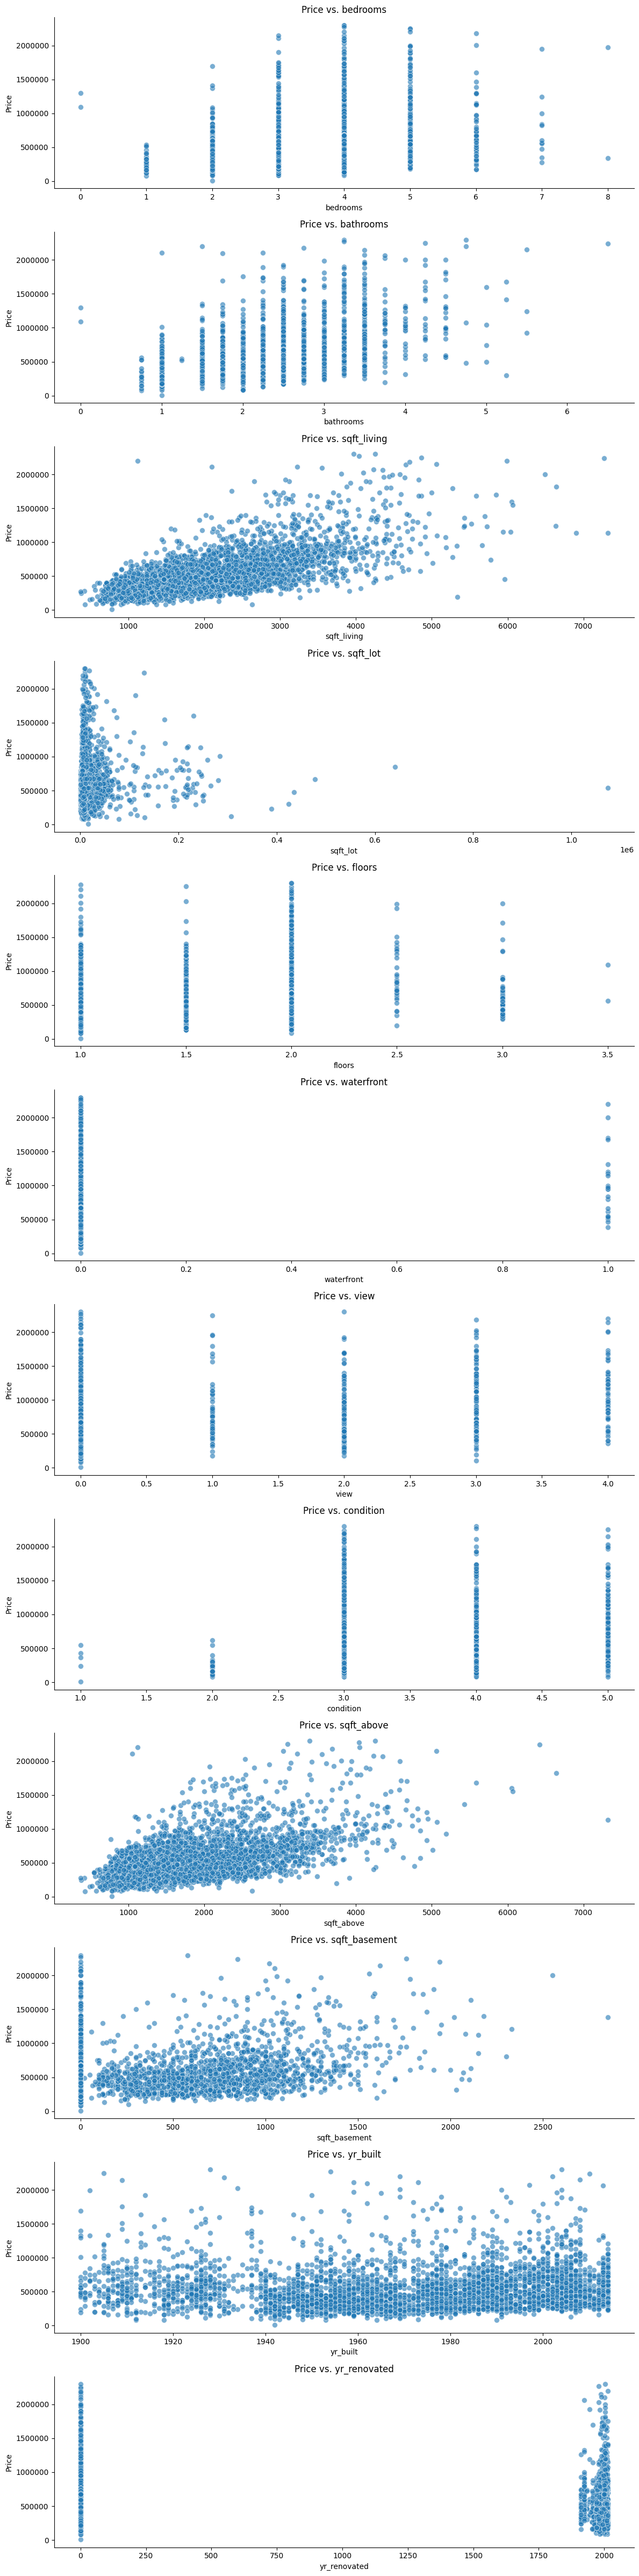

In [16]:
# @title Pairplots w/ price
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

num_features = df_cleaned_no_outliers.select_dtypes(include=['number']).columns.tolist()
num_features.remove('price')

plt.figure(figsize=(12, len(num_features) * 4))

for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.scatterplot(x=df_cleaned_no_outliers[feature], y=df_cleaned_no_outliers['price'], alpha=0.6, s=50)

    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.title(f'Price vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

    plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()



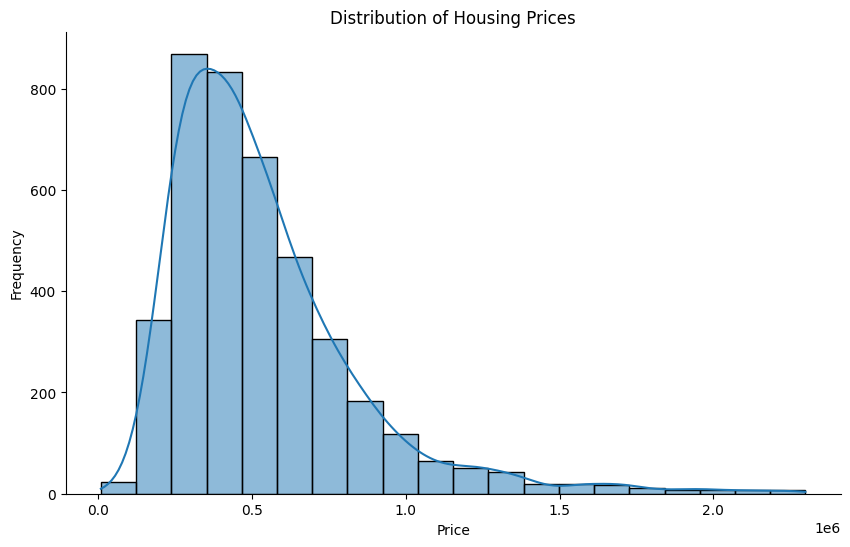

In [17]:
# @title Distribution of Housing Prices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_no_outliers['price'], bins=20, kde=True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


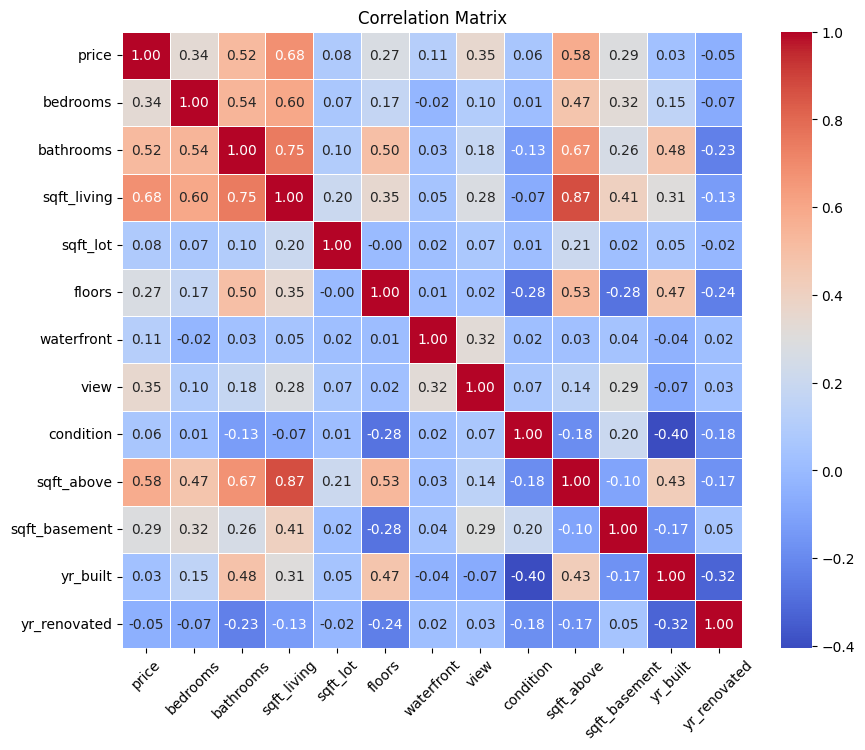

In [18]:
# @title Data Visualization Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Remove non-numeric columns
df_numeric = df_cleaned_no_outliers.select_dtypes(include=['number'])

# Compute correlation matrix for numeric columns only
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Titles and labels
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()





This is the LinearRegression model ->
R-squared: 0.7378
Mean Squared Error: 23654010492.9539
Mean Absolute Error: 94665.1882


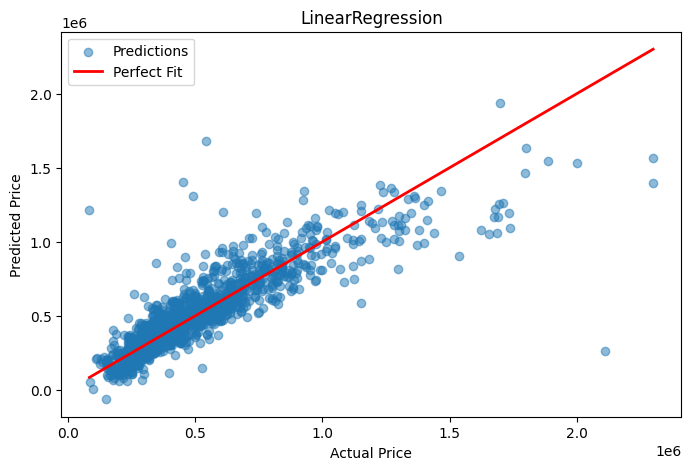

In [19]:
# @title Linear Regression Model, data cleaned and outliers removed
#df_cleaned_no_outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Importing LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df_cleaned_no_outliers.drop(columns=["date", "price", "country", "street", "city"], errors='ignore')  # Drop unnecessary columns

# One-Hot Encoding for zip code only (assuming the 'statezip' column contains zip code information)
X = pd.get_dummies(X, columns=["statezip"], drop_first=True)  # Drop the first column to avoid multicollinearity
y = df_cleaned_no_outliers["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define LinearRegression model
model = LinearRegression()  # Use LinearRegression instead of RandomForestRegressor
name = "LinearRegression"

# Train and evaluate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f"\n\nThis is the {name} model ->")
print(f"R-squared: {round(r2_score(y_test, y_predict), 4)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_predict), 4)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, y_predict), 4)}")

# Plot actual vs predicted values with numbers
plt.figure(figsize=(8, 5))
plt.title(f"{name}")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.5, label="Predictions")

# Add a diagonal line (perfect fit)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linewidth=2, label="Perfect Fit")

# Annotate a subset of points (to prevent overcrowding)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()





This is the LinearRegression model ->
R-squared: 0.5419
Mean Squared Error: 48028550434.8287
Mean Absolute Error: 121021.2251


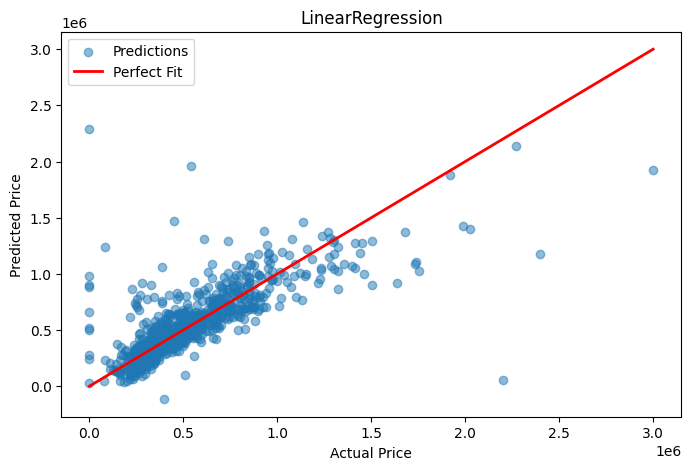

In [20]:
# @title Linear Regression Model with raw data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Importing LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df.drop(columns=["date", "price", "city", "street", "country"], errors='ignore')  # Drop unnecessary columns

# One-Hot Encoding for zip code only (assuming the 'statezip' column contains zip code information)
X = pd.get_dummies(X, columns=["statezip"], drop_first=True)  # Drop the first column to avoid multicollinearity

y = df["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define LinearRegression model
model = LinearRegression()  # Use LinearRegression instead of RandomForestRegressor
name = "LinearRegression"

# Train and evaluate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f"\n\nThis is the {name} model ->")
print(f"R-squared: {round(r2_score(y_test, y_predict), 4)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_predict), 4)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, y_predict), 4)}")

# Plot actual vs predicted values with numbers
plt.figure(figsize=(8, 5))
plt.title(f"{name}")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.5, label="Predictions")

# Add a diagonal line (perfect fit)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linewidth=2, label="Perfect Fit")

# Annotate a subset of points (to prevent overcrowding)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()





This is the RandomForestRegressor model ->
R-squared: 0.6621
Mean Squared Error: 30479500986.5492
Mean Absolute Error: 109376.2436


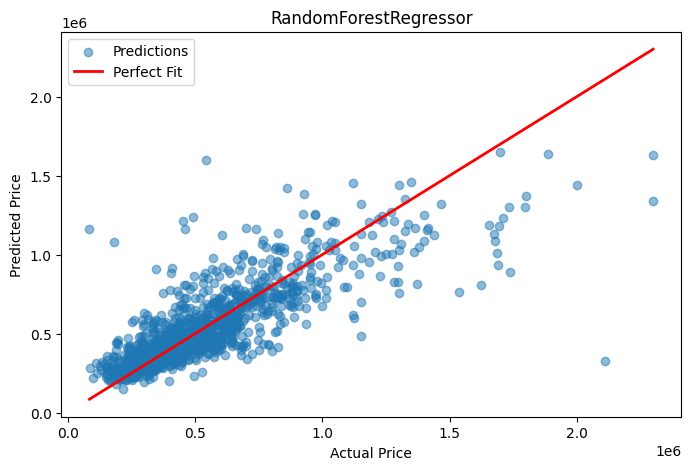

In [21]:
# @title Random Forest Regressor, Data Cleaned and Outliers Removed
#df_cleaned_no_outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df_cleaned_no_outliers.drop(columns=["date", "price", "city", "street", "country"], errors='ignore')  # Drop unnecessary columns

X = pd.get_dummies(X, columns=["statezip"], drop_first=True)

y = df_cleaned_no_outliers["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Define RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
name = "RandomForestRegressor"

# Train and evaluate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f"\n\nThis is the {name} model ->")
print(f"R-squared: {round(r2_score(y_test, y_predict), 4)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_predict), 4)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, y_predict), 4)}")

# Plot actual vs predicted values with numbers
plt.figure(figsize=(8, 5))
plt.title(f"{name}")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.5, label="Predictions")

# Add a diagonal line (perfect fit)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linewidth=2, label="Perfect Fit")

# Annotate a subset of points (to prevent overcrowding)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()




This is the RandomForestRegressor model ->
R-squared: 0.4462
Mean Squared Error: 58060156583.5952
Mean Absolute Error: 130537.2137


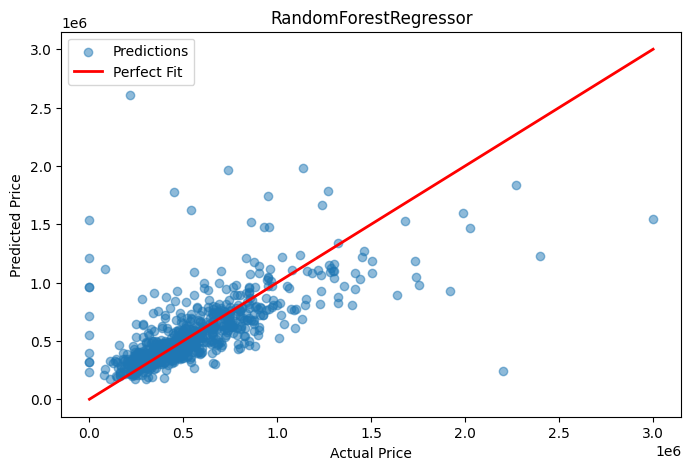

In [22]:
# @title Random Forest Regressor, Raw Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df.drop(columns=["date", "price", "city", "street", "country"], errors='ignore')  # Drop unnecessary columns

X = pd.get_dummies(X, columns=["statezip"], drop_first=True)

y = df["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
name = "RandomForestRegressor"

# Train and evaluate the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f"\n\nThis is the {name} model ->")
print(f"R-squared: {round(r2_score(y_test, y_predict), 4)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, y_predict), 4)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, y_predict), 4)}")

# Plot actual vs predicted values with numbers
plt.figure(figsize=(8, 5))
plt.title(f"{name}")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.5, label="Predictions")

# Add a diagonal line (perfect fit)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linewidth=2, label="Perfect Fit")

# Annotate a subset of points (to prevent overcrowding)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()


In [ ]:
# @title Notes on Regression Models & Sensitivity Analysis (cleaning Missing Data & Outliers)

'''
-The linear regression model performed slightly better than the random forest indicatint simple relationships between variables
-On the raw data both models performed poorly, fitting the data badly, r-squared value indicating the model justified only half the variabiity
-The models performed significantly better on the cleaned and outlier-removed data but still consistently received <75% r-squared values
-indicates variables do not fully explain prices
'''

In [24]:
# @title Part III- Expanded Knowledge, adittional data sets?
'''
Expanding Your Investment Knowledge
Beyond this dataset, what other data sources could help inform your investment
strategy? Find at least one additional dataset related to real estate and explain:
• Why would this dataset be useful?
• How could it complement the data you are currently analyzing?
• Provide a link to the additional dataset.
'''


'\nExpanding Your Investment Knowledge\nBeyond this dataset, what other data sources could help inform your investment\nstrategy? Find at least one additional dataset related to real estate and explain:\n• Why would this dataset be useful?\n• How could it complement the data you are currently analyzing?\n• Provide a link to the additional dataset.\n'

A time series of housing/rent prices over a specific period or price per square footage would be helpful to indicate growth or appreciation in value of homes in certain areas or with certain features.

Additional Data Set: (Kaggle) EDA on Zillow's rent index
link: https://www.kaggle.com/datasets/zillow/rent-index

This data set would increase the scope of the analysis to other cities and states in the US and provide tracking of prices over time.

It would also provide a massive amount of additonal data from a credible source (Zillow) to smooth any outliers or bad data

In [25]:
# @title Part IV- Communicate Findings, Conclusions & Determinations
'''
Communicating Your Findings
Your submission should be structured for an audience that is not familiar with real
estate or data analysis. Ensure that your explanations are clear and concise.
'''

'\nCommunicating Your Findings\nYour submission should be structured for an audience that is not familiar with real\nestate or data analysis. Ensure that your explanations are clear and concise.\n'

-The data set was relatively clean but had a few missing data points and outliers.

-The scope of the data is limited to ~4,000 homes in Washington State sold during 2014.

-The data set is not very credible as it lacks a verifiable source and background information

-There are more than a dozen features which may add unecessary noise to the data and confuse or overfit any ML models.

-Theoretically, regression or other ML models could be used to identify arbitrage oppurtunities where homes may be "undervalued" in the market, and flipped for a profit.

-Further analysis could be done with time series data to identify geographical areas (cities, streets etc.) in which home or rent prices are appreciating rapidly and could provide Real Estate oppurtunities

-The ML models I ran performed mediocre (did not fit the data very well), even with missing values and outliers removed. (*see above about unecessary features)

-The square footage of living space had the greatest correlation with price of the home among all of the features (~0.68), predicted price the "best"